<a href="https://colab.research.google.com/github/Sankarlalr23/Automotive_Telematics_Analytics/blob/main/Telematics_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings                         #'do not disturb' mode
 
warnings.filterwarnings('ignore')
 
import numpy as np                      # vectors and matrices
import pandas as pd                     # tables and data manipulations
import matplotlib.pyplot as plt         # plots
import seaborn as sns                   # more plots
 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
 
train_path='/content/drive/My Drive/Xen.AI/'
data = pd.read_csv('/content/drive/My Drive/Xen.AI/telematics_data.csv')   # data importing

Mounted at /content/drive/


In [ ]:
data.head()

,year,month,day,vin,wmi,engine_cd,device_type,msg_ts,vin_utc_key,packet_id,reason_code,script_version,deviceid,latitude,longitude,driveridcode1,obdvin,vehiclebattvolts,fuel_total,engine_rpm,coolant_tmp,fuel_lvl_pct,driving_tme_sec,cruise_tme_sec,idle_tme_sec,idle_fuel_total,pto_tme_total,pto_fuel_total,gear,fuel_tmp,oil_tmpl,throt_pos,mpg,acel_pos,engine_pct_load,torque,oil_lvl,oil_psi,coolant_psi,intak_air_tmp,manifold_tmp,vehiclespeed,heading,odometerinmeters,odometer
0,2020,4,18,3HSDZTZR9KN352697,3HS,TZ,Xirgo,2020-04-18 06:50:40,3HSDZTZR9KN3526972020-04-18 06:50:40,36,9,204.0,173101817,38.799149,-90.603680,0.0,3HSDZTZR9KN352697,14.2,106165.0,1144.0,79.0,41.0,NaN,NaN,2167380.0,1503.0,0.0,0.0,1.0,0.0,76.0,0.0,NaN,0.0,11.0,12.0,0.0,340.0,0.0,4.0,10.0,1005.0,960.0,380663000.0,380663.0
1,2020,5,20,3HSDZTZR9LN055320,3HS,TZ,Xirgo,2020-05-20 03:01:09,3HSDZTZR9LN0553202020-05-20 03:01:09,36,9,204.0,172301945,33.618963,-84.333847,0.0,3HSDZTZR9LN055320,NaN,NaN,584.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,56.0,1.0,NaN,0.0,26.0,11.0,0.0,228.0,0.0,24.0,NaN,11.0,700.0,88781990.0,NaN
2,2020,4,1,3HSDZTZR0KN354211,3HS,TZ,Xirgo,2020-04-01 20:02:39,3HSDZTZR0KN3542112020-04-01 20:02:39,36,9,204.0,173511306,41.139005,-101.173123,0.0,3HSDZTZR0KN354211,NaN,113134.0,1145.0,81.0,NaN,NaN,NaN,1788120.0,1172.0,NaN,0.0,1.0,0.0,NaN,0.0,NaN,NaN,41.0,42.0,NaN,320.0,0.0,25.0,NaN,NaN,2709.0,416436440.0,NaN
3,2020,5,5,3HSDWTZR8LN845362,3HS,TZ,Xirgo,2020-05-05 06:17:36,3HSDWTZR8LN8453622020-05-05 06:17:36,36,9,204.0,173404340,38.856184,-98.139251,0.0,3HSDWTZR8LN845362,14.0,149410.0,1368.0,81.0,54.0,NaN,NaN,786600.0,497.0,0.0,0.0,1.0,0.0,86.0,0.0,NaN,0.0,19.0,19.0,0.0,424.0,0.0,13.0,30.0,1095.0,838.0,426460520.0,NaN
4,2020,4,7,3HSDZTZRXLN085409,3HS,TZ,N2,2020-04-07 20:14:07,3HSDZTZRXLN0854092020-04-07 20:14:07,36,9,204.0,190815-0009,33.351086,-87.017387,0.0,3HSDZTZRXLN085409,14.1,33886.0,1167.0,82.0,NaN,4755420.0,NaN,NaN,504.0,0.0,0.0,1.0,NaN,88.0,0.0,NaN,NaN,65.0,67.0,NaN,320.0,NaN,NaN,NaN,1090.0,458.0,107975440.0,NaN


In [ ]:
# Data frame with important variables only
df = pd.DataFrame(data, columns = ['vin','msg_ts','device_type','fuel_total','engine_rpm','coolant_tmp','oil_tmpl',
                       'throt_pos','torque','oil_psi','manifold_tmp','vehiclespeed','odometerinmeters'])

In [ ]:
df['msg_ts']=pd.to_datetime(df['msg_ts'])  # Converting msg_ts to date time

In [ ]:
df = df.reset_index()
df = df.drop('index', axis =1)
 
df.isnull().sum()/len(df) * 100

vin                  0.000000
msg_ts               0.000000
device_type          0.000000
fuel_total          11.810623
engine_rpm           0.000000
coolant_tmp         11.096828
oil_tmpl            11.075469
throt_pos           11.072168
torque               7.697760
oil_psi             11.084984
manifold_tmp        10.909447
vehiclespeed         5.309576
odometerinmeters     5.280256
dtype: float64

In [ ]:
df = df.dropna(axis = 0, how = 'any')
 
df = df[df["device_type"] == 'Xirgo']
df = df[df["engine_rpm"] >= 1000]
 
df = df.drop('device_type', axis =1)
 
df = df.reset_index()
df = df.drop('index', axis =1)
 
df.isnull().sum()/len(df) * 100

vin                 0.0
msg_ts              0.0
fuel_total          0.0
engine_rpm          0.0
coolant_tmp         0.0
oil_tmpl            0.0
throt_pos           0.0
torque              0.0
oil_psi             0.0
manifold_tmp        0.0
vehiclespeed        0.0
odometerinmeters    0.0
dtype: float64

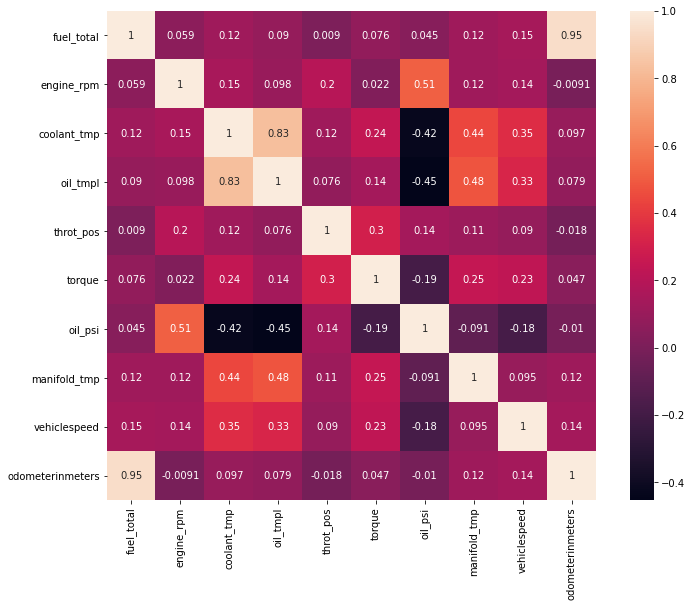

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=1, square=True, annot = True)
plt.show()

In [ ]:
df.columns

Index(['vin', 'msg_ts', 'fuel_total', 'engine_rpm', 'coolant_tmp', 'oil_tmpl',
       'throt_pos', 'torque', 'oil_psi', 'manifold_tmp', 'vehiclespeed',
       'odometerinmeters'],
      dtype='object')

In [ ]:
columns = ['fuel_total', 'engine_rpm', 'coolant_tmp', 'oil_tmpl','throt_pos', 'torque', 'oil_psi', 'manifold_tmp', 'vehiclespeed',
       'odometerinmeters']

In [ ]:
len(columns)

10

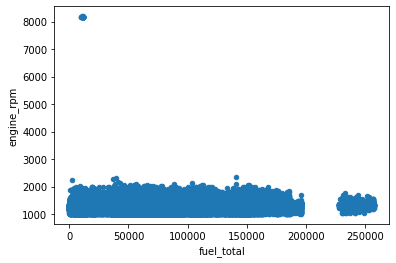

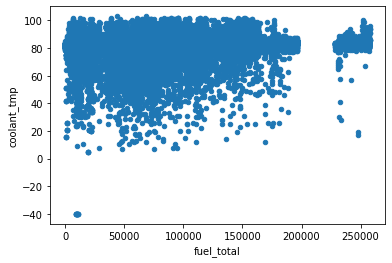

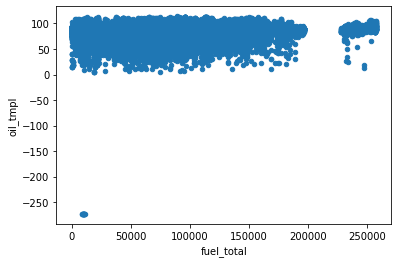

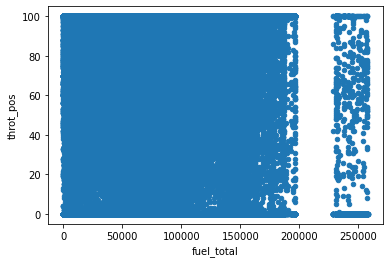

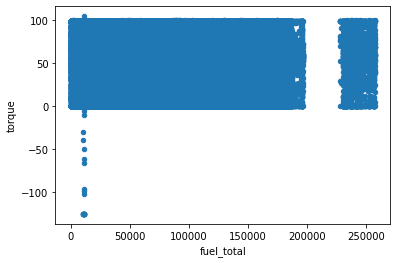

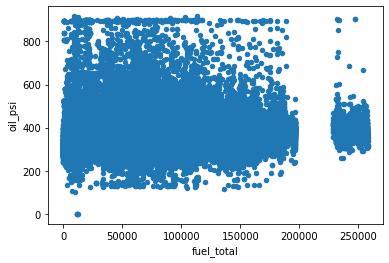

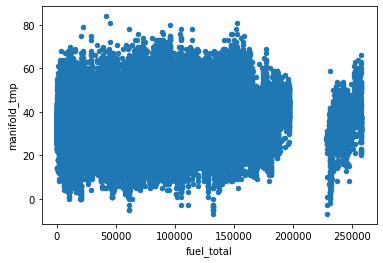

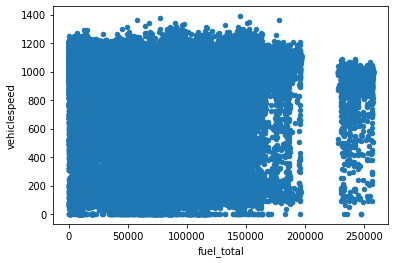

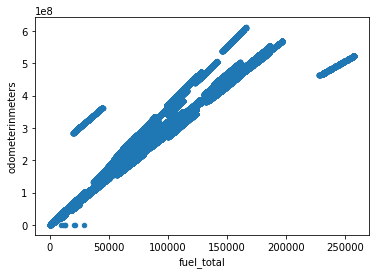

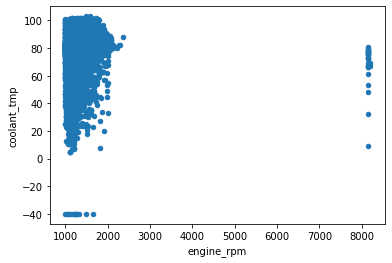

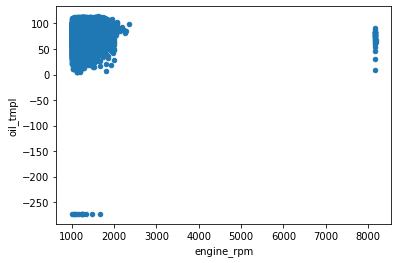

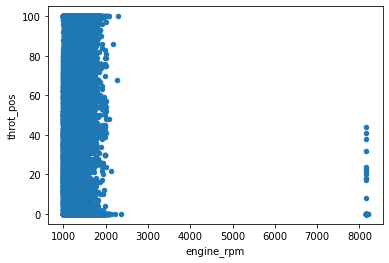

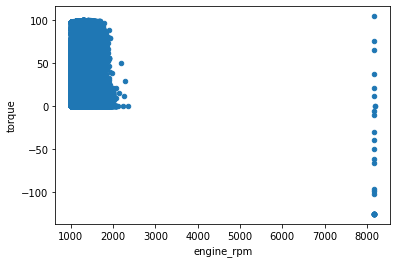

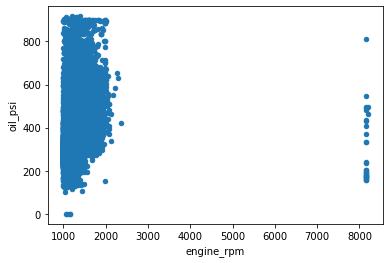

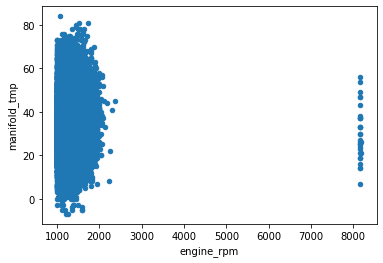

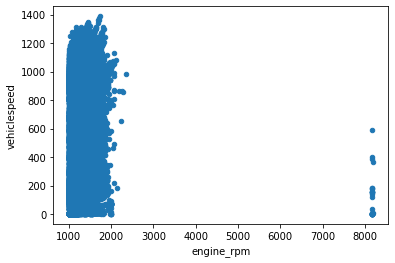

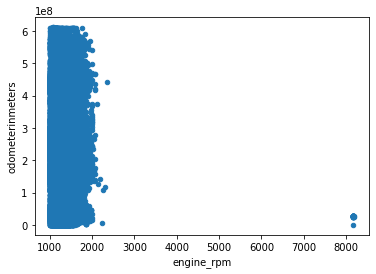

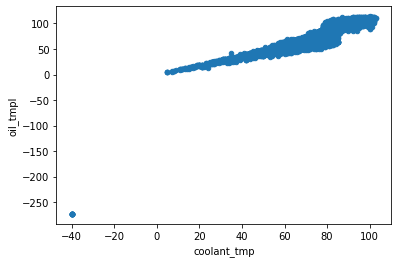

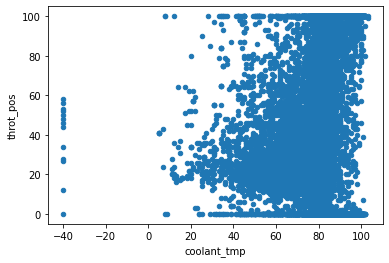

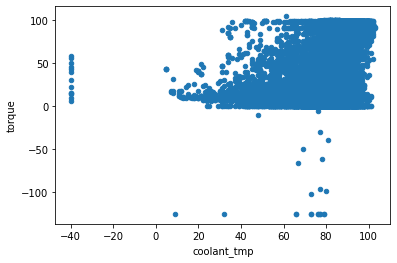

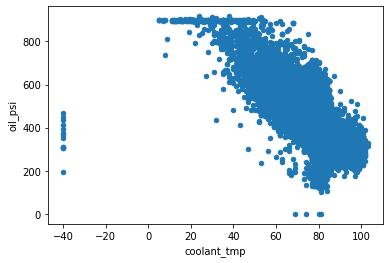

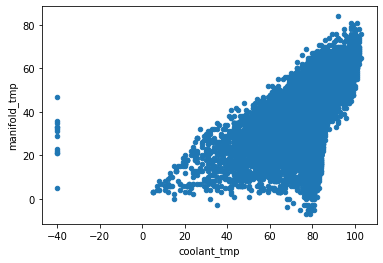

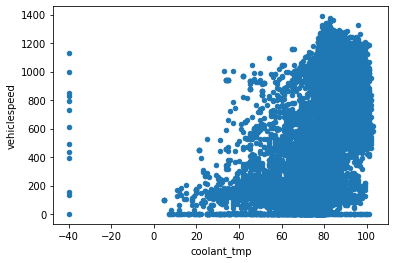

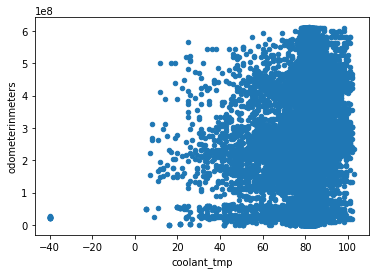

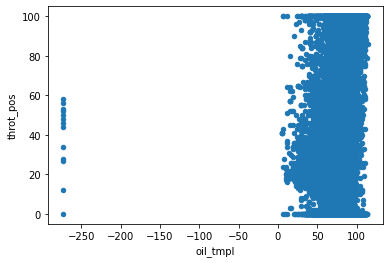

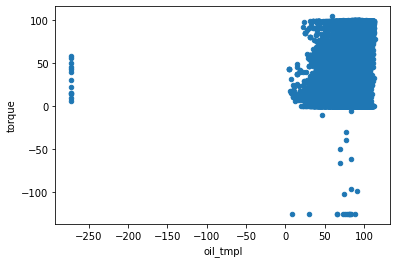

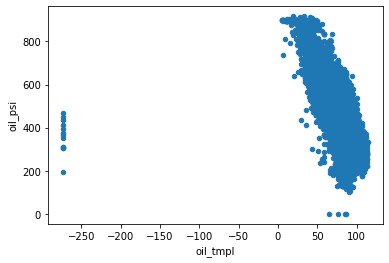

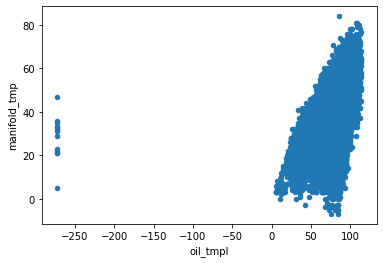

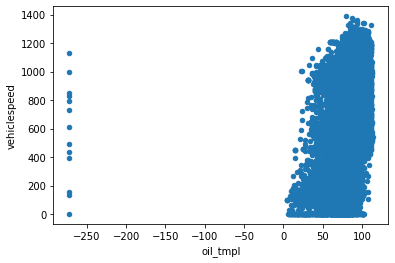

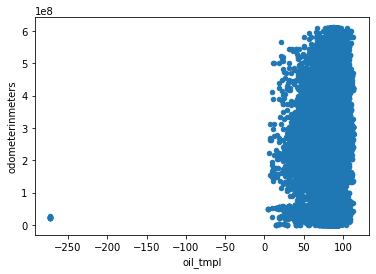

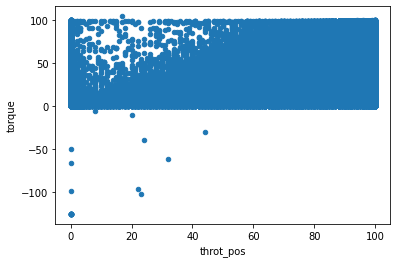

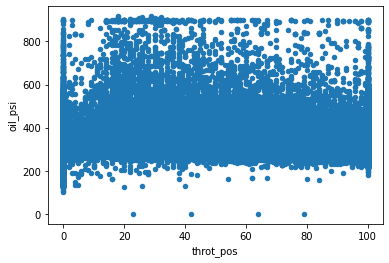

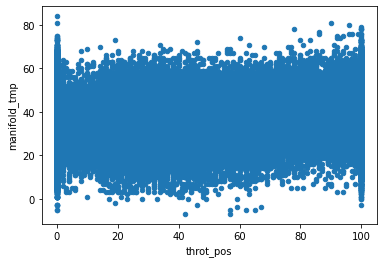

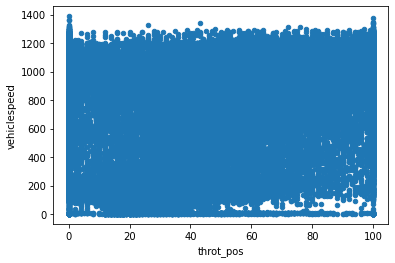

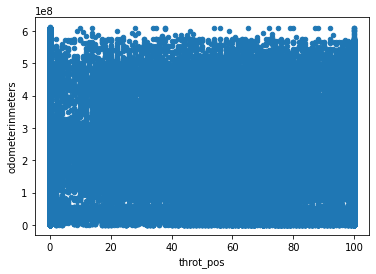

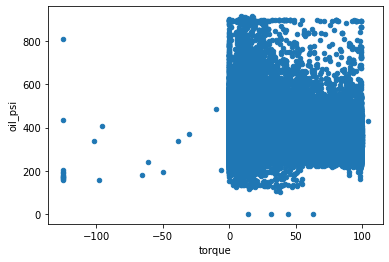

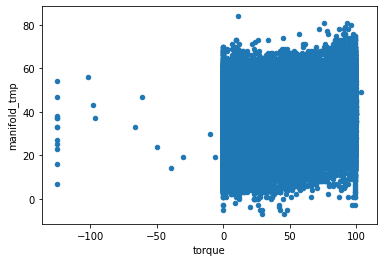

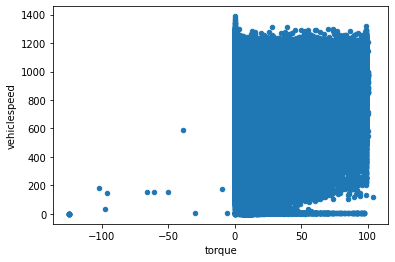

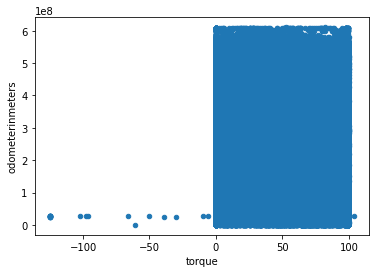

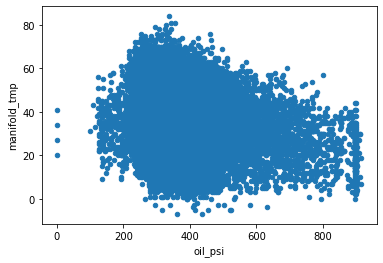

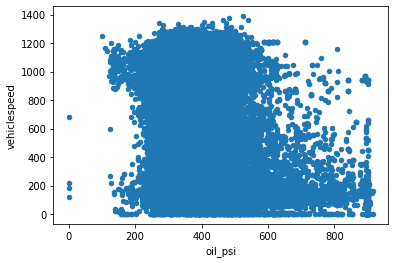

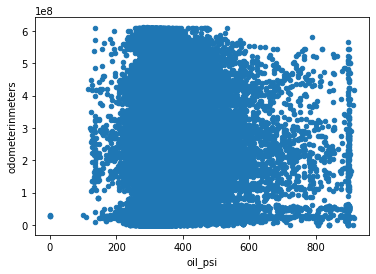

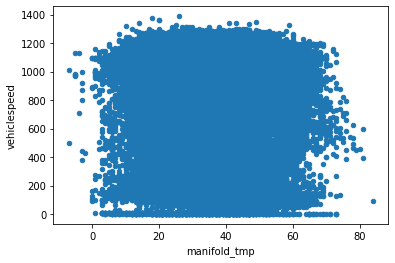

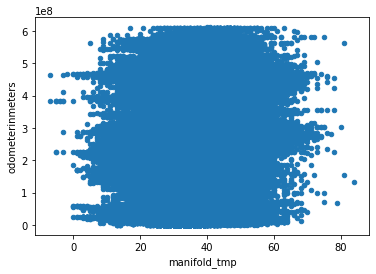

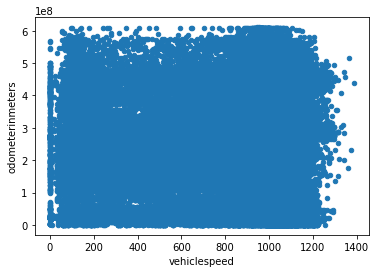

In [ ]:
for i in range(len(columns)):
  for j in range(i+1, len(columns)):
    df.plot.scatter(columns[i],columns[j])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
 
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = df
df_scaled[columns] = scaler.fit_transform(df[columns])
df_scaled[columns].head()

,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
0,0.411899,0.020025,0.832168,0.901809,0.0,0.598253,0.371179,0.186813,0.724063,0.623361
1,0.579693,0.051175,0.846154,0.927649,0.0,0.628821,0.462882,0.406593,0.788905,0.698357
2,0.215999,0.001113,0.832168,0.919897,0.0,0.646288,0.301310,0.417582,0.638329,0.333734
3,0.246174,0.021694,0.839161,0.914729,0.0,0.973799,0.344978,0.406593,0.724784,0.327526
4,0.353353,0.023223,0.853147,0.922481,1.0,0.768559,0.314410,0.428571,0.788184,0.434493


In [ ]:
df_scaled.head()

,vin,msg_ts,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
0,3HSDZTZR9KN352697,2020-04-18 06:50:40,0.411899,0.020025,0.832168,0.901809,0.0,0.598253,0.371179,0.186813,0.724063,0.623361
1,3HSDWTZR8LN845362,2020-05-05 06:17:36,0.579693,0.051175,0.846154,0.927649,0.0,0.628821,0.462882,0.406593,0.788905,0.698357
2,3HSDZTZR6LN056070,2020-04-07 17:34:58,0.215999,0.001113,0.832168,0.919897,0.0,0.646288,0.301310,0.417582,0.638329,0.333734
3,3HSDWTZR7LN064378,2020-04-06 13:04:54,0.246174,0.021694,0.839161,0.914729,0.0,0.973799,0.344978,0.406593,0.724784,0.327526
4,3HSDZTZR1LN125327,2020-04-18 09:50:22,0.353353,0.023223,0.853147,0.922481,1.0,0.768559,0.314410,0.428571,0.788184,0.434493


In [ ]:
for i in range(len(columns)):
  globals()['X' + str(i)] = df_scaled[columns[i]].values.reshape(-1,1)
 
X = np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8,X9), axis = 1)

In [ ]:
X.shape

(215269, 10)

## PyOD

In [ ]:
!pip install pyod

!pip install --upgrade pyod  # to make sure that the latest version is installed!

!pip install combo

Requirement already up-to-date: pyod in /usr/local/lib/python3.7/dist-packages (0.8.8)


In [ ]:
# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

In [ ]:
random_state = np.random.RandomState(42)

outliers_fraction = 0.05   #Assuming 5% Outliers

classifier_names = {
                    'ABOD' : 'Angle-based Outlier Detector (ABOD)',
                    'CBLOF': 'Cluster-based Local Outlier Factor (CBLOF)',
                    'FBagging' : 'Feature Bagging',
                    'HBOS' : 'Histogram-base Outlier Detection (HBOS)',
                    'IForest' : 'Isolation Forest',
                    'KNN' : 'K Nearest Neighbors (KNN)',
                    'AvgKNN' : 'Average KNN',
                    'LOF' : 'Local Outlier Factor (LOF)',
                    'OCSVM' : 'One-class SVM (OCSVM)',
                    'PCA' : 'Principal Component Analysis (PCA)'
                    }

classifiers = {
               'ABOD' : ABOD(contamination=outliers_fraction),
               'CBLOF': CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
               'FBagging' : FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
               'HBOS' : HBOS(contamination=outliers_fraction),
               'IForest' : IForest(contamination=outliers_fraction,random_state=random_state),
               'KNN' : KNN(contamination=outliers_fraction),
               'AvgKNN' : KNN(method='mean',contamination=outliers_fraction),
               'LOF' : LOF(n_neighbors=35, contamination=outliers_fraction),
               'OCSVM' : OCSVM(contamination=outliers_fraction),
               'PCA' : PCA(contamination=outliers_fraction, random_state=random_state)
               }

In [ ]:
from scipy import stats

def detect_outliers(clf_short_name):
  
  clf_name = classifier_names[clf_short_name]
  clf = classifiers[clf_short_name]

  clf.fit(X)

  # predict raw anomaly score
  scores_pred = clf.decision_function(X) * -1
      
  # prediction of a datapoint category outlier or inlier
  y_pred = clf.predict(X)
  n_inliers = len(y_pred) - np.count_nonzero(y_pred)
  n_outliers = np.count_nonzero(y_pred == 1)
  # plt.figure(figsize=(10, 10))

  # copy of dataframe
  dfx = df_scaled
  dfx['outlier'] = y_pred.tolist()

  # IX Inlier features
  for j in range(len(columns)):
    globals()['IX' + str(j+1)] = np.array(dfx[columns[j]][dfx['outlier'] == 0]).reshape(-1,1)

  # OX outlier features
  for k in range(len(columns)):
    globals()['OX' + str(k+1)] = np.array(dfx[columns[k]][dfx['outlier'] == 1]).reshape(-1,1)

        
  print(clf_name)
  print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers)
  
      
  # threshold value to consider a datapoint inlier or outlier
  threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
      
  # decision function calculates the raw anomaly score for every point
  globals()['Z_' + clf_short_name ] = (clf.decision_function(X) * -1).reshape(X.shape[0],1)

  return(dfx , globals()['Z_' + clf_short_name ])


In [ ]:
def vins_list (df_clf):
  df_outlier  = df_clf[df_clf['outlier']==1]
  print('No. of Vins with outliers : {}'.format(df_outlier['vin'].nunique()))
 
  dups = df_outlier.pivot_table(index = ['vin'], aggfunc ='size')
  dupsdf=pd.DataFrame(dups)
  dupsdf=dupsdf.apply(lambda x: x.sort_values(ascending=False))
 
  print('No. of Vins with More than 100 outliers : {}'.format(len(dupsdf[dupsdf[0]>100].index)))
 
  return (dupsdf[dupsdf[0]>100])

In [ ]:
print('Total No. Of vins : {}'.format(df_scaled['vin'].nunique()))

Total No. Of vins : 100


### 1. Angle-based Outlier Detector (ABOD)

In [ ]:
df_ABOD , ABOD_anomaly_score = detect_outliers('ABOD')

Angle-based Outlier Detector (ABOD)
OUTLIERS :  6024 INLIERS :  209245


In [ ]:
# df_ABOD

In [ ]:
vins_list(df_ABOD).index.sort

No. of Vins with outliers : 91
No. of Vins with More than 100 outliers : 12


<bound method Index.sort of Index(['3HSDZTZRXLN395656', '3HSDZTZR3LN154022', '3HSDZTZR8KN398425',
       '1HSERTZRXLH809470', '3HSDZTZR5LN134290', '3HSDWTZR5LN844783',
       '3HSDZTZR1KN174476', '3HSDZTZR0KN279915', '3HSDZTZR0LN630677',
       '3HSDZTZR4KN126504', '3HSDZTZR8KN537162', '3HCDZTZR2LL070362'],
      dtype='object', name='vin')>

### Cluster-based Local Outlier Factor (CBLOF)

In [ ]:
df_CBLOF , CBLOF_anomaly_score = detect_outliers('CBLOF')

Cluster-based Local Outlier Factor (CBLOF)
OUTLIERS :  10764 INLIERS :  204505


In [ ]:
# df_CBLOF

In [ ]:
vins_list(df_CBLOF).index.sort

No. of Vins with outliers : 89
No. of Vins with More than 100 outliers : 32


<bound method Index.sort of Index(['1HSERTZRXLH809470', '3HCDZTZR2LL070362', '3HSDWTZR7LN064378',
       '3HSDZTZR8KN398425', '3HSDZTZR5LN134290', '3HCDZTZRXLL056502',
       '3HSDZTZRXLN395656', '3HSDWTZR9LN810071', '3HSDZTZR3LN154022',
       '3HSDWTZR7LN810070', '3HSDZTZR4KN126504', '3HCDYTZN8LL296583',
       '3HCDZTZR6LL833600', '3HSDZTZR0KN279915', '3HSDWTZR7LN844803',
       '3HSDZTZR6LN065318', '3HCDZTZR1LL158318', '3HSDWTZR1LN845199',
       '3HSDZTZR2LN075067', '3HSDZTZR3KN315175', '3HSDZTZR0KN354211',
       '3HSDWTZR5LN844783', '3HSDWTZR1LN845090', '3HSDWTZR9KN310622',
       '3HSDZTZR3LN054647', '3HSDZTZR4LN056083', '3HSDWTZR9LN845337',
       '3HSDZTZR1KN174476', '3HCDZTZR6LL833595', '3HSDWTZRXKN310631',
       '3HSDZTZR6LN056148', '3HSDZTZR0LN062656'],
      dtype='object', name='vin')>

### Histogram-base Outlier Detection (HBOS)

In [ ]:
df_HBOS , HBOS_anomaly_score = detect_outliers('HBOS')

Histogram-base Outlier Detection (HBOS)
OUTLIERS :  10761 INLIERS :  204508


In [ ]:
# df_HBOS

In [ ]:
vins_list(df_HBOS).index.sort

No. of Vins with outliers : 91
No. of Vins with More than 100 outliers : 36


<bound method Index.sort of Index(['1HSERTZRXLH809470', '3HSDZTZR5LN134290', '3HSDZTZR8KN398425',
       '3HCDZTZR2LL070362', '3HSDZTZR1KN174476', '3HSDWTZRXKN310631',
       '3HSDZTZR3LN154022', '3HSDZTZR0KN279915', '3HSDZTZR4KN126504',
       '3HCDZTZRXLL056502', '3HSDZTZR8KN537162', '3HSDWTZR7LN064378',
       '3HSDWTZR9LN810071', '3HSDZTZR3KN315175', '3HSDZTZR0LN630677',
       '3HSDZTZR0LN880114', '3HSDZTZR7LN630689', '3HSDWTZR7LN810070',
       '3HSDWTZR0LN845338', '3HCDZTZR6LL833600', '3HSDZTZR0KN354211',
       '3HSDZTZR9KN136686', '3HSDZTZR2LN630681', '3HSDZTZR8LN139435',
       '3HSDZTZRXLN395656', '3HSDZTZR7KN314305', '3HSDZTZR9KN352697',
       '3HCDZTZR1LL158318', '3HSDWTZR8KN308697', '3HSDWTZR1LN845199',
       '3HSDZTZR0LN384388', '3HSDWTZR5LN845352', '3HSDZTZR9LN055320',
       '3HSDZTZRXLN443043', '3HCDYTZN8LL296583', '3HSDZTZR3LN054647'],
      dtype='object', name='vin')>

### Isolation Forest

In [ ]:
df_IF , IF_anomaly_score = detect_outliers('IForest')

Isolation Forest
OUTLIERS :  10764 INLIERS :  204505


In [ ]:
# df_IF

In [ ]:
vins_list(df_IF).index.sort

No. of Vins with outliers : 88
No. of Vins with More than 100 outliers : 32


<bound method Index.sort of Index(['1HSERTZRXLH809470', '3HSDZTZR0KN279915', '3HSDZTZR5LN134290',
       '3HSDZTZR8KN398425', '3HSDWTZRXKN310631', '3HSDZTZR1KN174476',
       '3HSDZTZR4KN126504', '3HSDZTZR8KN537162', '3HSDWTZR0LN845338',
       '3HSDZTZR0LN630677', '3HSDWTZR8KN308697', '3HCDZTZR2LL070362',
       '3HSDZTZR7LN630689', '3HCDZTZR6LL833600', '3HSDZTZR3KN315175',
       '3HSDZTZR8LN139435', '3HSDZTZRXLN395656', '3HSDWTZR5LN845352',
       '3HSDWTZR7LN064378', '3HSDZTZR0KN354211', '3HSDZTZR2LN630681',
       '3HCDZTZR1LL158318', '3HCDZTZRXLL056502', '3HSDZTZR3LN154022',
       '3HSDZTZR9KN136686', '3HSDWTZR9LN810071', '3HSDWTZR9LN845337',
       '3HSDZTZR3LN054647', '3HSDWTZR1LN845199', '3HSDZTZR7KN314305',
       '3HSDZTZR2LN817113', '3HSDWTZR7LN810070'],
      dtype='object', name='vin')>

### K Nearest Neighbors (KNN)

In [ ]:
df_KNN , KNN_anomaly_score = detect_outliers('KNN')

K Nearest Neighbors (KNN)
OUTLIERS :  9373 INLIERS :  205896


In [ ]:
# df_KNN

In [ ]:
vins_list(df_KNN).index.sort

No. of Vins with outliers : 92
No. of Vins with More than 100 outliers : 40


<bound method Index.sort of Index(['1HSERTZRXLH809470', '3HSDZTZR1KN174476', '3HSDZTZR5LN134290',
       '3HSDWTZR5LN844783', '3HSDZTZR0KN279915', '3HSDZTZR4KN126504',
       '3HSDZTZR0LN630677', '3HSDZTZR8KN537162', '3HSDWTZRXKN310631',
       '3HSDZTZR3KN315175', '3HCDZTZR2LL070362', '3HSDZTZR0LN880114',
       '3HSDZTZR8KN398425', '3HSDZTZR7LN630689', '3HSDZTZR0KN354211',
       '3HSDWTZR9LN810071', '3HSDZTZR2LN630681', '3HSDZTZR3LN154022',
       '3HSDZTZR9KN352697', '3HCDZTZRXLL056502', '3HSDWTZR7LN810070',
       '3HSDZTZR2LN112232', '3HSDZTZRXLN395656', '3HSDWTZRXKN315831',
       '3HSDWTZR5LN845352', '3HCDZTZR6LL833600', '3HSDWTZR7LN064378',
       '3HSDWTZR5LN845092', '3HCDZTZR1LL158318', '3HSDZTZR7KN314305',
       '3HSDWTZR8KN308697', '3HSDZTZR0LN384388', '3HSDZTZRXLN085409',
       '3HSDZTZR4KN547798', '3HSDZTZR0LN062656', '3HSDZTZR8LN139435',
       '3HSDWTZR3KN308686', '3HSDWTZR8LN845362', '3HSDZTZR9KN136686',
       '3HSDWTZR1LN845199'],
      dtype='object', name='vin')

### Average KNN

In [ ]:
df_AKNN , AKNN_anomaly_score = detect_outliers('AvgKNN')

Average KNN
OUTLIERS :  4228 INLIERS :  211041


In [ ]:
# df_AKNN

In [ ]:
vins_list(df_AKNN).index.sort

No. of Vins with outliers : 88
No. of Vins with More than 100 outliers : 7


<bound method Index.sort of Index(['1HSERTZRXLH809470', '3HSDWTZR5LN844783', '3HSDZTZR0KN279915',
       '3HSDZTZR1KN174476', '3HSDZTZR5LN134290', '3HSDZTZR4KN126504',
       '3HSDZTZR0LN630677'],
      dtype='object', name='vin')>

### Local Outlier Factor (LOF)

In [ ]:
df_LOF , LOF_anomaly_score = detect_outliers('LOF')

Local Outlier Factor (LOF)
OUTLIERS :  9907 INLIERS :  205362


In [ ]:
# df_LOF

In [ ]:
vins_list(df_LOF).index.sort

No. of Vins with outliers : 95
No. of Vins with More than 100 outliers : 42


<bound method Index.sort of Index(['3HSDZTZR5LN134290', '3HSDWTZR5LN844783', '3HSDZTZR1KN174476',
       '3HSDZTZR0KN279915', '3HSDZTZR8KN398425', '1HSERTZRXLH809470',
       '3HSDZTZR3KN315175', '3HSDZTZR0LN630677', '3HSDZTZR8LN139435',
       '3HSDZTZRXLN395656', '3HSDZTZR3LN154022', '3HSDZTZR2LN630681',
       '3HSDZTZR4KN547798', '3HSDZTZR8KN537162', '3HSDWTZR2LN845423',
       '3HSDZTZR4KN126504', '3HSDWTZR9LN845337', '3HCDZTZR6LL833595',
       '3HSDZTZR2LN112232', '3HSDZTZR2LN817113', '3HSDZTZR7KN314305',
       '3HSDWTZR3KN308686', '3HSDZTZR1LN125327', '3HSDZTZR0LN880114',
       '3HSDWTZRXKN310631', '3HSDWTZR3LN845348', '3HSDZTZR7LN630689',
       '3HSDWTZRXKN315831', '3HSDZTZR1LN081863', '3HSDZTZR9LN055320',
       '3HSDZTZR0LN384388', '3HSDWTZR8LN845362', '3HSDZTZR9KN136686',
       '3HSDWTZR5LN845352', '3HSDZTZRXLN085409', '3HSDZTZR3LN054647',
       '3HSDWTZR9LN844849', '3HCDZTZR6LL833600', '3HSDZTZR0LN437333',
       '3HSDWTZR6LN844811', '3HSDZTZR9KN352697', '3HSDZTZR3LN8

### Principal Component Analysis (PCA)

In [ ]:
df_PCA , PCA_anomaly_score = detect_outliers('PCA')

Principal Component Analysis (PCA)
OUTLIERS :  10764 INLIERS :  204505


In [ ]:
# df_PCA

In [ ]:
vins_list(df_PCA).index.sort

No. of Vins with outliers : 88
No. of Vins with More than 100 outliers : 31


<bound method Index.sort of Index(['1HSERTZRXLH809470', '3HSDZTZR5LN134290', '3HSDZTZR0KN279915',
       '3HSDZTZR8KN398425', '3HSDZTZR1KN174476', '3HSDZTZR4KN126504',
       '3HSDZTZR8KN537162', '3HCDZTZR2LL070362', '3HCDZTZR6LL833600',
       '3HSDZTZRXLN395656', '3HSDZTZR0LN630677', '3HCDZTZRXLL056502',
       '3HSDZTZR8LN139435', '3HSDWTZR7LN064378', '3HSDWTZR9LN810071',
       '3HSDWTZR0LN845338', '3HSDWTZRXKN310631', '3HCDZTZR1LL158318',
       '3HSDZTZR3KN315175', '3HSDZTZR7LN630689', '3HSDZTZR9KN136686',
       '3HSDZTZR3LN154022', '3HSDZTZR3LN054647', '3HSDZTZR0KN354211',
       '3HSDWTZR7LN810070', '3HSDZTZR9LN055320', '3HSDZTZR2LN630681',
       '3HSDWTZR5LN845352', '3HSDZTZR2LN075067', '3HSDZTZR3LN833708',
       '3HSDWTZR1LN845199'],
      dtype='object', name='vin')>

### Feature Bagging

In [ ]:
df_FB , FB_anomaly_score = detect_outliers('FBagging')

Feature Bagging
OUTLIERS :  9735 INLIERS :  205534


In [ ]:
# df_FB

In [ ]:
vins_list(df_FB).index.sort

No. of Vins with outliers : 96
No. of Vins with More than 100 outliers : 40


<bound method Index.sort of Index(['3HSDZTZR5LN134290', '3HSDWTZR5LN844783', '3HSDZTZR1KN174476',
       '3HSDZTZR0KN279915', '3HSDZTZR8LN139435', '3HSDZTZR8KN398425',
       '3HSDZTZR0LN630677', '1HSERTZRXLH809470', '3HSDZTZR3KN315175',
       '3HSDZTZR8KN537162', '3HSDWTZR9LN845337', '3HSDWTZR2LN845423',
       '3HSDZTZR2LN630681', '3HSDZTZR3LN154022', '3HSDZTZR4KN126504',
       '3HSDZTZRXLN395656', '3HSDZTZRXLN085409', '3HSDWTZRXKN315831',
       '3HSDZTZR2LN817113', '3HSDZTZR0LN384388', '3HSDWTZRXKN310631',
       '3HSDZTZR2LN112232', '3HSDWTZR3LN845348', '3HSDZTZR7LN630689',
       '3HSDZTZR9LN055320', '3HSDZTZR9KN136686', '3HSDZTZR7KN314305',
       '3HSDWTZR3KN308686', '3HSDZTZR1LN081863', '3HSDWTZR0LN844822',
       '3HSDZTZR0LN880114', '3HSDZTZR4KN547798', '3HSDZTZR0LN437333',
       '3HSDWTZR5LN845352', '3HCDZTZR6LL833595', '3HSDZTZR3LN054647',
       '3HSDZTZR0LN291791', '3HSDZTZR3LN833708', '3HSDWTZR8KN308697',
       '3HSDZTZR4LN056083'],
      dtype='object', name='vin')

### One-class SVM (OCSVM)

In [ ]:
df_OCSVM , OCSVM_anomaly_score = detect_outliers('OCSVM')

One-class SVM (OCSVM)
OUTLIERS :  10764 INLIERS :  204505


In [ ]:
# df_OCSVM

In [ ]:
vins_list(df_OCSVM).index.sort

No. of Vins with outliers : 87
No. of Vins with More than 100 outliers : 13


<bound method Index.sort of Index(['3HSDZTZR0KN279915', '1HSERTZRXLH809470', '3HSDWTZRXKN310631',
       '3HSDZTZR1KN174476', '3HSDWTZR8KN308697', '3HSDZTZR8KN537162',
       '3HSDZTZRXLN395656', '3HSDZTZR8KN398425', '3HCDZTZR1LL158318',
       '3HCDZTZR6LL833600', '3HSDZTZR3LN054647', '3HSDZTZR8LN139435',
       '3HCDYTZN8LL296583'],
      dtype='object', name='vin')>